In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

red = np.array([164,22,35])/256
green = np.array([20,89,29])/256
neutral = np.array([245,226,200])/256

redder = red-neutral
greener = green-neutral

In [31]:
sample_data = {
    "recall_breakdown": [[3.0, 2.0], [1.0, 0.9], [1.5, 0.9], [1.0, 0.9], [0.2, 0.9]], 
    "precision_breakdown": {
        "missed_changes": 5, 
        "by_lookahead": [[3.0, 2.0], [1.0, 0.9], [1.5, 0.9], [1.0, 0.9], [0.2, 0.9]], 
        "by_change_type": [[0.0, 0.0], [0.1, 10.000000000000002], [0.0, 23.5]]
        }
}
sample_num=0

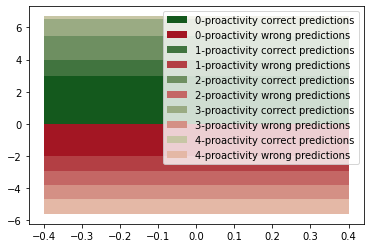

In [34]:
fig, ax = plt.subplots()
recall_steps = len(sample_data['recall_breakdown'])

prev_pos, prev_neg = 0, 0
for step, (num_pos, num_neg) in enumerate(sample_data['recall_breakdown']) :
    ax.bar(sample_num, num_pos, bottom=prev_pos, color=green-greener*step/recall_steps, label=str(step)+'-proactivity correct predictions')
    ax.bar(sample_num, -num_neg, bottom=prev_neg, color=red-redder*step/recall_steps, label=str(step)+'-proactivity wrong predictions')
    prev_pos += num_pos
    prev_neg -= num_neg
plt.legend()
plt.show()

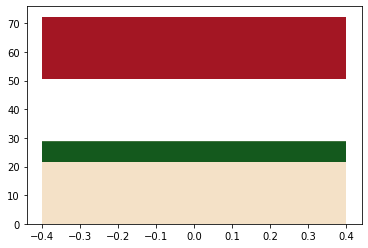

In [35]:
fig, ax = plt.subplots()
prec_steps = len(sample_data['precision_breakdown']['by_lookahead'])

bottom=0
for step, (pos, _) in enumerate(sample_data['precision_breakdown']['by_lookahead']):
    ax.bar(sample_num, pos, bottom=bottom, color=green-greener*step/recall_steps, label=str(step)+'-proactivity correct predictions')
    bottom += pos

ax.bar(sample_num, sample_data['precision_breakdown']['missed_changes'], bottom=bottom, color=neutral, label='missed changes')
bottom += sample_data['precision_breakdown']['missed_changes']

for step in range(len(sample_data['precision_breakdown']['by_lookahead'])-1, -1, -1):
    neg = sample_data['precision_breakdown']['by_lookahead'][step][1]
    ax.bar(sample_num, neg, bottom=bottom, color=red-redder*step/recall_steps, label=str(step)+'-proactivity wrong predictions')
    bottom += neg


In [8]:
print(plt.get_cmap('Blues')[0])

TypeError: 'LinearSegmentedColormap' object is not subscriptable

'#1f77b4'